In [98]:
import json
import pandas as pd

with open("shows.json", "r") as read_file:
    data = json.load(read_file)

In [99]:
df= pd.read_csv('shows.csv')


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                36 non-null     int64  
 1   url               36 non-null     object 
 2   name              36 non-null     object 
 3   season            36 non-null     int64  
 4   number            36 non-null     int64  
 5   type              36 non-null     object 
 6   airdate           36 non-null     object 
 7   airtime           36 non-null     object 
 8   airstamp          36 non-null     object 
 9   runtime           36 non-null     int64  
 10  rating/average    36 non-null     float64
 11  image/medium      36 non-null     object 
 12  image/original    36 non-null     object 
 13  summary           36 non-null     object 
 14  _links/self/href  36 non-null     object 
 15  _links/show/href  36 non-null     object 
dtypes: float64(1), int64(4), object(11)
memory usa

In [101]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating/average,image/medium,image/original,summary,_links/self/href,_links/show/href
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>A woman named Dolores is a free spirit in t...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard suspects that someone is sabotaging...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Bernard continues to investigate Dolores' s...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>While Dolores joins William and Logan on th...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,<p>Dolores takes the first step on her path of...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371


In [102]:
df.drop(['_links/self/href','_links/show/href','airstamp'],axis=1,inplace=True)


In [103]:
df['airdate']=df['airdate'].astype('datetime64[D]')


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              36 non-null     int64         
 1   url             36 non-null     object        
 2   name            36 non-null     object        
 3   season          36 non-null     int64         
 4   number          36 non-null     int64         
 5   type            36 non-null     object        
 6   airdate         36 non-null     datetime64[ns]
 7   airtime         36 non-null     object        
 8   runtime         36 non-null     int64         
 9   rating/average  36 non-null     float64       
 10  image/medium    36 non-null     object        
 11  image/original  36 non-null     object        
 12  summary         36 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 3.8+ KB


In [105]:
df['airtime'] = pd.to_datetime(df['airtime'])
df['airtime'] = df['airtime'].dt.time


In [106]:
import pandas as pd
from bs4 import BeautifulSoup

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
df['summary'] = df['summary'].apply(remove_html_tags)


In [107]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,rating/average,image/medium,image/original,summary
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00:00,68,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,A woman named Dolores is a free spirit in the ...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00:00,60,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard suspects that someone is sabotaging th...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00:00,60,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard continues to investigate Dolores' supp...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00:00,60,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,While Dolores joins William and Logan on their...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00:00,60,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Dolores takes the first step on her path of di...


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              36 non-null     int64         
 1   url             36 non-null     object        
 2   name            36 non-null     object        
 3   season          36 non-null     int64         
 4   number          36 non-null     int64         
 5   type            36 non-null     object        
 6   airdate         36 non-null     datetime64[ns]
 7   airtime         36 non-null     object        
 8   runtime         36 non-null     int64         
 9   rating/average  36 non-null     float64       
 10  image/medium    36 non-null     object        
 11  image/original  36 non-null     object        
 12  summary         36 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 3.8+ KB


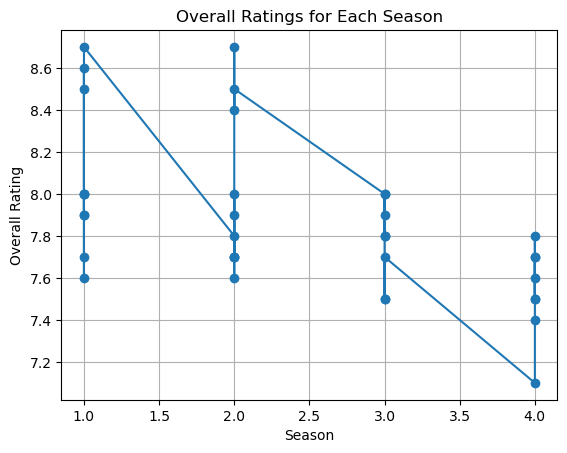

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(df['season'], df['rating/average'], marker='o', linestyle='-')
plt.xlabel('Season')
plt.ylabel('Overall Rating')
plt.title('Overall Ratings for Each Season')
plt.grid(True)
plt.show()



In [114]:
import pandas as pd

# Find the most popular episode (highest-rated) in each season
most_popular_episodes = df.groupby('season').apply(lambda x: x.loc[x['rating/average'].idxmax()])

# Print the summary for the most popular episode in each season
for season, episode in most_popular_episodes.iterrows():
    episode_name = episode['name']
    episode_summary = episode['summary']
    print(f"Season {season}: Most Popular Episode - {episode_name}")
    print(f"Summary: {episode_summary}")
    print()


Season 1: Most Popular Episode - The Bicameral Mind
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2: Most Popular Episode - Kiksuya
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3: Most Popular Episode - Parce Domine
Summary: If you're stuck in a loop, try walking in a straight line.

Season 4: Most Popular Episode - Zhuangzi
Summary: God is bored.

